# Machine Learning Models applied to student Drop Out data¶

## Data access
- from: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention
- Creating an account, logging in
- downloading a zip file, ‘archive.zip’, 
- the extracted file was called, dataset.csv’
- copy 'dataset.csv' to the location of this notebook

The official data repository is zenodo and can be cited as: Valentim Realinho, Jorge Machado, Luís Baptista, & Mónica V. Martins. (2021). Predict students' dropout and academic success (1.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.5777340


## Data exploration

### MDPI Data Descriptor 
The data description, category meaning and a detailed explanation of the columns and values where found here: 
- https://doi.org/10.3390/data7110146
The paper confirms that the data has already been processed.

### Early Prediction of student’s Performance in Higher Education: A Case Study
- Read the linked paper using DOI: 10.1007/978-3-030-72657-7_16
- We found the dataset relates to a paper that was published in a book with the following authors Mónica V. Martins , Daniel Tolledo1, Jorge Machado , Luís M. T. Baptista , and Valentim Realinho
- Our initial plan is to reproduce the figures of the paper



- Taken from: https://www.kaggle.com/datasets/thedevastator/higher-education-predictors-of-student-retention

This dataset contains data from a higher education institution on various variables related to undergraduate students, including demographics, social-economic factors, and academic performance, to investigate the impact of these factors on student dropout and academic success

|Feature Name|Description|Feature Type| Our comments |
|----|-----|-----|----|
|Demograhic Data|
| Marital status| The marital status of the student. |int64|    Family responsibilities impacting dropouts?|
| Nationality| The nationality of the student.|int64| More committment for foreign students?|
| Displaced| Whether the student is a displaced person.|int64| Moved from hometown Not described in MDPI. Yes - 1, No - 0 ||
| Gender| The gender of the student.|int64| Male - 1, Female - 0 |
| Age at enrollment| The age of the student at the time of enrollment.|int64|
| International| Whether the student is an international student. |int64| Yes - 1, No - 0 |
|Socioeconomic Data|
| Mother's qualification| The qualification of the student's mother. |int64| See MDPI for what the numbers mean |
| Father's qualification| The qualification of the student's father. |int64| See MDPI for what the numbers mean |
| Mother's occupation| The occupation of the student's mother.|int64| See MDPI for what the numbers mean |
| Father's occupation| The occupation of the student's father.|int64| See MDPI for what the numbers mean |
| Educational special needs| Whether the student has any special educational needs.|int64|Yes - 1, No - 0 |
| Debtor| Whether the student is a debtor at institution.|int64| Yes - 1, No - 0 |
| Tuition fees up to date| Whether the student's tuition fees are up to date.|int64| Yes - 1, No - 0 |
| Scholarship holder| Whether the student is a scholarship holder.|int64|  Yes - 1, No - 0 |
|Macroeconomic Data|
| Unemployment rate| The Unemployment Rate |float64| 
| Inflation rate| The Inflation rate |float64|
| GDP| The GDP Rate in the country |float64|  |
|Academic data at enrollment|
| Application mode| The method of application used by the student.|int64| 
| Application order| The order in which the student applied. |int64| Students choose several programs when applying(?) No information listed in MDPI |
| Course |The course taken by the student. |int64| 
| Daytime/evening attendance| Whether the student attends classes during the day or in the evening. |int64| Daytime - 1, Evening - 0 | |
| Previous qualification |The qualification obtained by the student before enrolling in higher education. |int64|  |
|Academic data at the end of 1st semester|
| Curricular units 1st sem (credited)| The number of curricular units credited by the student in the first semester. |int64| Curricular units are similar to ECTS credits|
| Curricular units 1st sem (enrolled)| The number of curricular units enrolled by the student in the first semester. |int64| Registered for a course |
| Curricular units 1st sem (evaluations)| The number of curricular units evaluated by the student in the first semester. |int64| Curricular units passed in first semester|
| Curricular units 1st sem (approved)| The number of curricular units approved by the student in the first semester. |int64|Curricular units passed in a course |
| Curricular units 1st sem (grade)| The grade recevied in the first semester. |float64|  Total grade |
| Curricular units 1st sem (without evaluations)| The number of curricular units approved by the student in the first semester. |int64| Curricular units pending approval   |
|Academic data at the end of 2nd semester|
| Curricular units 2nd sem (credited)| The number of curricular units credited by the student in the second semester. |int64|Curricular units are similar to ECTS credits|
| Curricular units 2nd sem (enrolled)| The number of curricular units enrolled by the student in the second semester. |int64| Registered for a course  |
| Curricular units 2nd sem (evaluations)| The number of curricular units evaluated by the student in the second semester. |int64| Curricular units passed in first semester |
| Curricular units 2nd sem (approved)| The number of curricular units approved by the student in the second semester. |int64|  Curricular units passed in a course |
| Curricular units 2nd sem (grade)| The grade recevied in the second semester. |float64| We assumed this means the total grade. |
|Curricular units 2nd sem (without evaluations)| The number of curricular units approved by the student in the second semester. |int64|Curricular units pending approval |
|Target |
| Target| The target is categorical: dropouts, graduates, and enrolled. |object|


#### The Portuguese grading system
https://www.studyineurope.eu/study-in-portugal/grades
https://tecnico.ulisboa.pt/en/education/study-at-tecnico/academic-information/enrolments/


## Global Settings 

In [665]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler 

from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from io import StringIO 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from IPython.display import Image  
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree

!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [666]:
# open the datset and display
df = pd.read_csv("dataset.csv",sep=',')
df.head(10)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
5,2,12,1,17,0,12,1,22,27,10,...,0,5,17,5,11.500000,5,16.2,0.3,-0.92,Graduate
6,1,1,1,12,1,1,1,13,28,8,...,0,8,8,8,14.345000,0,15.5,2.8,-4.06,Graduate
7,1,9,4,11,1,1,1,22,27,10,...,0,5,5,0,0.000000,0,15.5,2.8,-4.06,Dropout
8,1,1,3,10,1,1,15,1,1,10,...,0,6,7,6,14.142857,0,16.2,0.3,-0.92,Graduate
9,1,1,1,10,1,1,1,1,14,5,...,0,6,14,2,13.500000,0,8.9,1.4,3.51,Dropout


# Explore Data

In [667]:
df.shape

(4424, 35)

In [668]:
df = df.dropna() # check for NA values, No preprocessing needed 

In [669]:
df.shape

(4424, 35)

The authors stated that “The final dataset consisted of 3623 records and 25 independent variables.” (Page 169)
However our findings are that there are 4424 rows and 35 columns

Findings: The dataset contained 4424 records with 35 attributes which is consistent with data description, Page 2

In [670]:
for i in df.columns:
    print(i) 
    #print (df[i].value_counts())

Marital status
Application mode
Application order
Course
Daytime/evening attendance
Previous qualification
Nacionality
Mother's qualification
Father's qualification
Mother's occupation
Father's occupation
Displaced
Educational special needs
Debtor
Tuition fees up to date
Gender
Scholarship holder
Age at enrollment
International
Curricular units 1st sem (credited)
Curricular units 1st sem (enrolled)
Curricular units 1st sem (evaluations)
Curricular units 1st sem (approved)
Curricular units 1st sem (grade)
Curricular units 1st sem (without evaluations)
Curricular units 2nd sem (credited)
Curricular units 2nd sem (enrolled)
Curricular units 2nd sem (evaluations)
Curricular units 2nd sem (approved)
Curricular units 2nd sem (grade)
Curricular units 2nd sem (without evaluations)
Unemployment rate
Inflation rate
GDP
Target


In [671]:
print(df.dtypes)

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [672]:
df['Course'].value_counts()# validate 17 undergrade degrees

12    766
9     380
10    355
6     337
15    331
14    268
17    268
11    252
5     226
2     215
3     215
4     210
16    192
7     170
8     141
13     86
1      12
Name: Course, dtype: int64

In [673]:
#taken from the paper                                 # mapping data set from MDPI Paper  
DemographicFactors = ['Marital status', 
                         'Gender', 
                         'Marital status', 
                         'Nacionality',               # 'Noted typo in the Column name, Nationality/Nacionality'
                         'Displaced',              
                         'Age at enrollment'] 

In [674]:
#taken from the paper
socioEconomicFactors =  ['Mother’s qualification', 
                           'Father’s qualification',           
                           'Mother’s occupation',             
                           'Father’s occupation',    
                           'Educational special needs',                    
                           'Debtor'
                           'Tuition fees up to date'
                           'Scholarship holder']                   

In [675]:
#taken from the paper
macroEconomicFactors = ['Unemployment rate',                     
                       'Inflation rate', 
                       'GDP'] 


In [676]:
#taken from the paper
academicDataAtEnrollment =  ['Application mode', 
                           'Application order',           
                           'Course',             
                           'Daytime/evening attendance',    
                           'Previous qualification']

In [677]:
#taken from the paper
academicData1stSemester =  ['Curricular units 1st sem (credited)', 
                           'Curricular units 1st sem (enrolled)',           
                           'Curricular units 1st sem (evaluations)',             
                           'Curricular units 1st sem (approved)',    
                           'Curricular units 1st sem (grade)',                    
                           'Curricular units 1st sem (without evaluations)']                   

In [678]:
#taken from the paper
academicData2ndSemester =  ['Curricular units 2nd sem (credited)', 
                           'Curricular units 2nd sem (enrolled)',           
                           'Curricular units 2nd sem (evaluations)',             
                           'Curricular units 2nd sem (approved)',    
                           'Curricular units 2nd sem (grade)',                    
                           'Curricular units 2nd sem (without evaluations)']                   

## Visualization of Target variable 

In [679]:
df['Target'].value_counts()

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64

In [680]:
#Convert series to list: (seriestolist)
#https://sparkbyexamples.com/pandas/convert-pandas-series-to-list/#:~:text=Pandas%20Series.,and%20dictionary%20into%20a%20Series.

This colour palette was deliberately selected as an example for a palette that does not support colour blindness. Visualisation for our report was developed using Tableau.

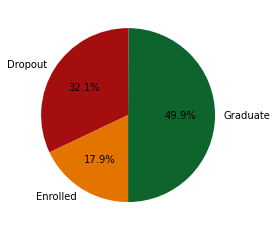

In [681]:
labels = ['Graduate', 'Dropout', 'Enrolled']
dataList=df['Target'].value_counts().tolist()
colors = ['#0D652D', '#A50E0E', '#E37400'] #colors = ['Green', 'Red', 'Yellow']

# Plot
fig, ax = plt.subplots()
ax.pie(dataList, labels=labels, colors=colors, autopct='%1.1f%%', startangle=270
      )
plt.savefig('pie-chart.png',bbox_inches="tight")
plt.show()

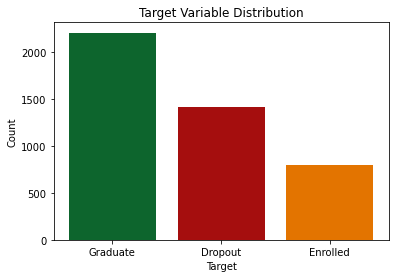

In [682]:
target_counts = df['Target'].value_counts()
colors = ['#0D652D', '#A50E0E', '#E37400']
fig, ax = plt.subplots()
ax.bar(target_counts.index, target_counts.values)
ax.bar(target_counts.index, target_counts.values, color=colors)
ax.set_xlabel('Target')
ax.set_ylabel('Count')
ax.set_title('Target Variable Distribution')
plt.savefig('Distribution.png', bbox_inches='tight')
plt.show()

## Feature selection: Model-Based Feature Selection ( Part 1 )

Baised on the preliminary machine model testing we discussed that it would be important to do a feature selection using a correlation matrix. 

Looking at the text book, page 238, Model-Based Feature Selection was used to help identify the most important features. 
"When adding new features, or with high-dimensional datasets in general,
it can be a good idea to reduce the number of features to only the most useful ones,
and discard the rest. This can lead to simpler models that generalize better." (page 236) 




In [683]:
x = df.drop('Target', axis=1)
y = df.Target
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

(3318, 34) (1106, 34) (3318,) (1106,)
X_train.shape: (3318, 34)
X_train_l1.shape: (3318, 17)


Figure 5. Most important features by index 


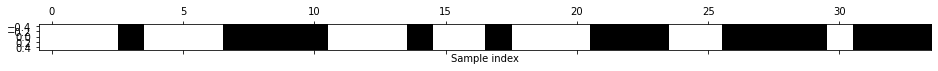

In [684]:
mask = select.get_support()
# visualize the mask -- black is True, white is False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
print("Figure 5. Most important features by index ")

Findings: Following the textbook it's difficult to identify the names because the above visualisation shows us the index number so the below code was used instead. 

In [685]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
importances = model.feature_importances_
selector = SelectFromModel(estimator=model, threshold='median')
X_selected = selector.fit_transform(X_train, y_train)
selected_indices = selector.get_support(indices=True)
selected_features = X_train.columns[selected_indices]# This gives us the Name of the features
selected_importances = importances[selected_indices]# This gives us the importances
selected_df = pd.DataFrame({'Feature': selected_features, 'Importance': selected_importances})
selected_df = selected_df.sort_values('Importance', ascending=False)
print("Most Important Features:")
print(selected_df)

Most Important Features:
                                   Feature  Importance
12     Curricular units 2nd sem (approved)    0.144803
13        Curricular units 2nd sem (grade)    0.101714
8      Curricular units 1st sem (approved)    0.094535
9         Curricular units 1st sem (grade)    0.070881
11  Curricular units 2nd sem (evaluations)    0.044918
6                        Age at enrollment    0.042369
5                  Tuition fees up to date    0.042237
0                                   Course    0.037026
7   Curricular units 1st sem (evaluations)    0.036503
4                      Father's occupation    0.034224
3                      Mother's occupation    0.032572
16                                     GDP    0.027016
2                   Father's qualification    0.026775
1                   Mother's qualification    0.026482
14                       Unemployment rate    0.025662
15                          Inflation rate    0.025277
10     Curricular units 2nd sem (enrolle

This can be dicussed in our paper and compared to the MDPI Data Descriptor section 324: Feature Importance, page 146.

## Feature selection: correlation matrix for Feature Selection ( Part 2 )

Reasoning: We are looking for the correlations with a 80% threshold which means the correlation over 0.8 or below -0.8. 
The thinking is that features with a high correlation are redundant to training the models. 

As an example; if we have 4 features for example internationality nationality country of birth and country of origin then in reality we're only having 1 feature, the Nationality that are meaningfully unique. 

So what we are looking for; if we have two strongly correlated variables the second variable automatically follows from the first variable so only there's only one variable carries important information for the model to learn from. 


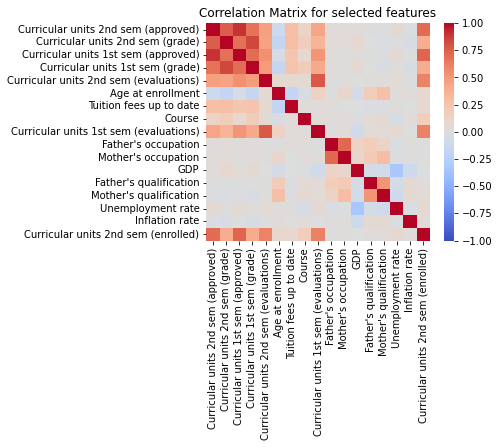

In [686]:
# Compute the correlation matrix for selected_features
correlation_matrix = df[selected_df['Feature']].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Matrix for selected features')
plt.savefig('correlation-selected-features.png',bbox_inches='tight')
plt.show()

In [687]:
threshold = 0.8
highly_correlated = []
n_features = correlation_matrix.shape[0]

for i in range(n_features):
    for j in range(i + 1, n_features):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            highly_correlated.append(pair)

print("Figure 6. Highly correlated items:")
for pair in highly_correlated:
    print(pair)

Figure 6. Highly correlated items:
('Curricular units 2nd sem (approved)', 'Curricular units 1st sem (approved)')
('Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)')


Result: Evidence suggests that students that do well in the first semester also do well in the second semester and so the first semester data becomes redundant for training the model this means that we will use second semester features to train the model. 

This also means that people that do not do well in the first semester also do not do well in the second semester yes according to the correlation matrix. 

In [688]:
#8 Curricular units 1st sem (approved)    0.094535
#9 Curricular units 1st sem (grade)    0.070881
selected_corr_df = selected_df.drop([8,9])
print(" Figure 7. Feature important final list  ")
selected_corr_df

 Figure 7. Feature important final list  


,Feature,Importance
12,Curricular units 2nd sem (approved),0.144803
13,Curricular units 2nd sem (grade),0.101714
11,Curricular units 2nd sem (evaluations),0.044918
6,Age at enrollment,0.042369
5,Tuition fees up to date,0.042237
0,Course,0.037026
7,Curricular units 1st sem (evaluations),0.036503
4,Father's occupation,0.034224
3,Mother's occupation,0.032572
16,GDP,0.027016


Findings: We are now left with 15 features out of the original 35 list of features 

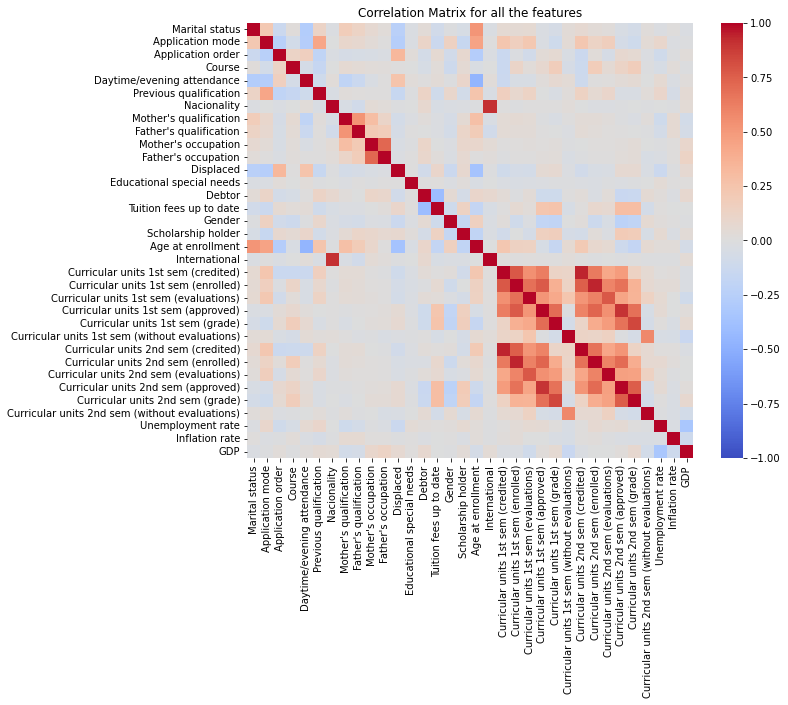

In [689]:
# Compute the correlation matrix
correlation_matrix = df.corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Matrix for all the features')
plt.savefig('correlation-all-features.png',bbox_inches='tight')
plt.show()

Reasoning: What we want is to try identify redundant features in order to remove features from the dataset that are highly correlated. 
What we want is a table of highly correlated features with a correlation coefficient higher than 70% and an indication of which one we keep in the dataset for the machine learning models. 

e.g. Curricular units first semester (credited) has a correlation with Curricular units second semester (credited) which could infer that students that are doing well stay within the program and do not drop out. 

Next steps: Out of the correlation metrics finding a list of highly correlated items so that we can determine which ones to drop

## Additional 

Below: Additional information apart of data exploration may not necessarily form part of the final report. 

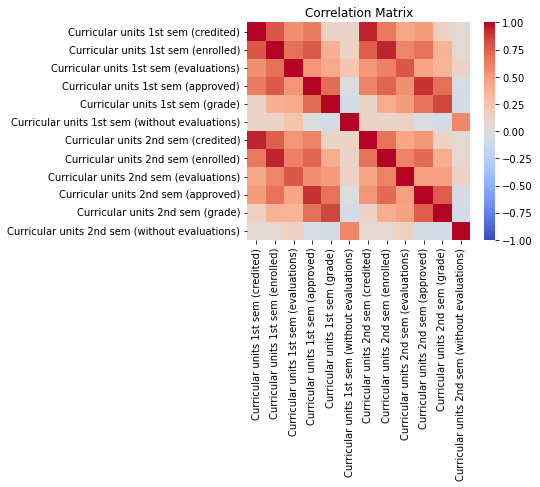

In [690]:
# Compute the correlation matrix
correlation_matrix = df[academicData1stSemester+academicData2ndSemester].corr()
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', vmin=-1,vmax=1)
plt.title('Correlation Matrix')
plt.savefig('correlation-academic.png',bbox_inches='tight')
plt.show()

# Train, Test Split after feature selection

In [691]:
#we split the data into features (x variables) and target variable (y variable)
x = df[selected_corr_df['Feature']]
y = df.Target

In [692]:
x.shape

(4424, 15)

In [693]:
y.shape

(4424,)

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
stratify is used to maintain the original distribution of classes when splitting the data, while SMOTE is used to alter the original distribution of classes to address class imbalance. They are often used together: you might first use SMOTE to oversample the minority class in your training set, then use stratified sampling to split your data into training and test sets.

In [694]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0, stratify=y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) #it randomises the data set
#but default it splits it by 75% / 25% with 75% assigned to the training data set 

(3318, 15) (1106, 15) (3318,) (1106,)


In [695]:
y_train.value_counts()

Graduate    1657
Dropout     1066
Enrolled     595
Name: Target, dtype: int64

In [696]:
y_test.value_counts()

Graduate    552
Dropout     355
Enrolled    199
Name: Target, dtype: int64

# Build a k-Nearest Neighbors model

In [697]:
# what happens during the training > we give it the data, it saves it as apart of the training 
knn = KNeighborsClassifier (n_neighbors=5) #intialise the Classifier, uses 5 of the closest rows/data points from the data set to make a predicition 
knn.fit (X_train, y_train) # train the model, fitting the model to the data 

KNeighborsClassifier()

## Evaluate the k-Nearest Neighbors model

In [698]:
print(f"Training set score: {knn.score(X_train, y_train):.2f}")
print (f"Test set score: {knn.score (X_test, y_test):.2f}")

Training set score: 0.77
Test set score: 0.68


### Optimisation Test : Loop with Distance or Uniform weighting kNN classifiers and varying numbers of neighbors 

Create a loop that builds kNN classifiers with either distance or uniform weighting, with numbers of neighbors varying between 1 and 20. What is the best combination? Produce a list consisting of test accuracy, training accuracy, number of neighbors and weighting choice. The list should be sorted by test accuracy.

In [699]:
list_of_entries = []
headers = ["nnum_neighbors", "weight", "train_score", "test_score"]
for k in range(1,21): #outter loop for num of neighbours 
    for weight in ["uniform", "distance"]: # inner loop for weight
        knn = KNeighborsClassifier (n_neighbors=k, weights= weight)
        knn.fit (X_train, y_train)
        entry = [k, weight, knn.score(X_train, y_train), knn.score(X_test,y_test)]
        list_of_entries.append(entry)

In [700]:
dfOpt2 = pd.DataFrame(list_of_entries, columns= headers)
print("Optimisation test using a nested For loop for kNN")
dfOpt2.sort_values(by=["test_score","train_score"], ascending=False).head(10)

Optimisation test using a nested For loop for kNN


,nnum_neighbors,weight,train_score,test_score
20,11,uniform,0.734479,0.705244
19,10,distance,1.000000,0.699819
21,11,distance,1.000000,0.698915
23,12,distance,1.000000,0.698011
25,13,distance,1.000000,0.698011
24,13,uniform,0.724533,0.698011
27,14,distance,1.000000,0.696203
18,10,uniform,0.738397,0.696203
11,6,distance,1.000000,0.695298
15,8,distance,1.000000,0.695298


Findings: After optimisation the above results show that nearest neighbours 13 with weight parameter of type distance provides the best score. However the train_score is almost 1 which could mean that there is overfitting ( we need to check this to be sure).

### Results: confusion matrix for Knn 

To analyse the quality of the model
https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

In [701]:
# Define class labels
class_labels = ['Graduate', "Dropout", 'Enrolled']
def plot_confusion_matrix( y_test, y_pred, filename):
    cm = confusion_matrix(y_test, y_pred,labels=class_labels)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    #plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(class_labels))
    plt.xticks(tick_marks, class_labels)
    plt.yticks(tick_marks, class_labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    thresh = cm.max() / 2.
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment='center',
                 color='white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.savefig( filename, bbox_inches='tight')
    plt.show()

Confusion matrix kNN after optimisation 


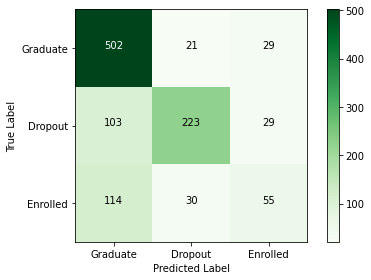

In [704]:
knn = KNeighborsClassifier (n_neighbors=11, weights= 'uniform')
knn.fit (X_train, y_train)  
# Make predictions on the test data
y_pred = knn.predict(X_test)
print("Confusion matrix kNN after optimisation ")
plot_confusion_matrix( y_test, y_pred, 'confusion-knn.png')

In [705]:
#https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
print("Classification Report kNN\n")
print(classification_report(y_test,y_pred,labels=class_labels))

Classification Report kNN

              precision    recall  f1-score   support

    Graduate       0.70      0.91      0.79       552
     Dropout       0.81      0.63      0.71       355
    Enrolled       0.49      0.28      0.35       199

    accuracy                           0.71      1106
   macro avg       0.67      0.60      0.62      1106
weighted avg       0.70      0.71      0.69      1106



Workflow: We created the machine learning model and optimise it based on the score and afterwards plot of a confusion matrix. 

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score

Findings: 

The goal in terms of precision, recall and the F1 score:

Our reasoning is that we don't want the model to miss any dropouts; this would be unwanted  since if someone is a dropout and labelled as a graduate, the student will not be indented to be included in any support interventions. This translates to the recall for the dropouts needing to be a high value ( i.e larger than 1, so we need to optimise it) and most important in our valuation of the models. 

Refocusing on the use case for this model: 

To identify drops to help design support interventions, e.g to send mentor invitations for potential drops. If the model incorrectly identified future graduates as dropouts, then what would really be the impact if the future graduate may receive a mentoring invitation for support. 


# Build a Linear model for classification: LogisticRegression classifier 

Findings: Due to there being 3 target values the Logistic Regression classifier model has to be of type multinomial

In [706]:
logreg = LogisticRegression(max_iter = 1000,multi_class='multinomial'
                           ).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.759
Test set score: 0.759


Print the three features with the highest coefficients -- these are the features which the model most strongly links with the target value. 


### Optimisation Test 1 :  Test using different values of C for a Logistic Regression model 

Try different values of C for a Logistic Regression model with the same data. Give results sorted by test accuracy. Each line of the output should include test accuracy, training accuracy, and C value.

In [707]:
#https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression

In [708]:
list_of_entries = []
headers = ["C", "train_score", "test_score"]
for Cc in [0.001,0.01, 0.1, 1,10, 100,1000,10000]: #outter loop for C parameter
    logreg = LogisticRegression(C = Cc, max_iter = 1000).fit(X_train, y_train)
    entry = [Cc, logreg.score(X_train, y_train), logreg.score(X_test,y_test)]
    list_of_entries.append(entry)

In [709]:
dfOpt3 = pd.DataFrame(list_of_entries, columns= headers)
dfOpt3.sort_values(by=["test_score","train_score"], ascending=False).head(15)

,C,train_score,test_score
5,100.000,0.758891,0.760398
3,1.000,0.759192,0.759494
2,0.100,0.758891,0.759494
4,10.000,0.758891,0.759494
7,10000.000,0.758891,0.759494
6,1000.000,0.758891,0.758590
1,0.010,0.748041,0.745931
0,0.001,0.729958,0.723327


In [710]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'max_iter': [1000]}

# Initialize the logistic regression classifier
logreg = LogisticRegression()

# Initialize GridSearchCV with 5-fold cross validation
grid = GridSearchCV(logreg, param_grid, cv=5)

# Fit grid on data
grid.fit(X_train, y_train)

# Print best parameters and scores
print("Best parameters: ", grid.best_params_)
print("Best cross-validation score: ", grid.best_score_)
print("Training set score: ", grid.score(X_train, y_train))
print("Test set score: ", grid.score(X_test, y_test))


Best parameters:  {'C': 0.1, 'max_iter': 1000}
Best cross-validation score:  0.7543654255029166
Training set score:  0.7588908981314044
Test set score:  0.759493670886076


Findings: The optimisation did not improve the test score much. We will
use the optimisted parameter C value = 0.100 

### Results: confusion matrix for Multinomial LogisticRegression 

To analyse the quality of the model
https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

 Confusion matrix Logistic Regression after optimisation test


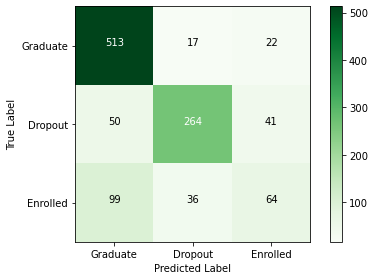

In [711]:
model = LogisticRegression(max_iter = 1000, C= 100, multi_class='multinomial')
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
print(" Confusion matrix Logistic Regression after optimisation test")
plot_confusion_matrix( y_test, y_pred, 'confusion-logreg.png')

In [712]:
#https://towardsdatascience.com/multi-class-metrics-made-simple-part-i-precision-and-recall-9250280bddc2
print("Classification Report Logistic Regression\n")
print(classification_report(y_test,y_pred,labels=class_labels))

Classification Report Logistic Regression

              precision    recall  f1-score   support

    Graduate       0.77      0.93      0.85       552
     Dropout       0.83      0.74      0.79       355
    Enrolled       0.50      0.32      0.39       199

    accuracy                           0.76      1106
   macro avg       0.70      0.66      0.67      1106
weighted avg       0.74      0.76      0.74      1106



Findings:
kNN has a worse recall when compared to Logistic Regression 

## Build Random forest models 

In [713]:
# Construct a random forest classifier for this data. Report train and test accuracy.

In [726]:
forest = RandomForestClassifier(n_estimators=100,max_depth=5)# build the forest classifer
forest.fit(X_train, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.761
Accuracy on test set: 0.750


Note: Max depth was set to 5 to prevent overfitting

In [727]:
# we give a tree a 'disadvantage', we dont give a tree everything 
# a selection of data (rows and columns) 
# but then each tree has to take a different look at the data 

In [728]:
list_of_entries = []
#headers
headers = ["n_estimators", "Train_score", "Test_score"]
for count in range (20,501,20): #20 at each iteration
    forest = RandomForestClassifier(n_estimators=count, random_state=2, max_depth=5)# build the forest classifer
    forest.fit(X_train, y_train) # train model 
    #print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
    #print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))
    entry = [count, forest.score(X_train, y_train), forest.score(X_test,y_test)] #adding the scores to variable
    list_of_entries.append(entry)
df = pd.DataFrame(list_of_entries, columns= headers)
df.sort_values(by=["Test_score","Train_score"], ascending=False)

,n_estimators,Train_score,Test_score
18,380,0.758891,0.750452
17,360,0.758891,0.749548
19,400,0.757987,0.749548
16,340,0.759494,0.748644
20,420,0.757685,0.748644
12,260,0.761302,0.747740
10,220,0.761001,0.747740
14,300,0.760398,0.747740
15,320,0.759192,0.747740
21,440,0.758590,0.747740


Create a line plot of train and test scores for each value of the number of estimators, by completing the following code.

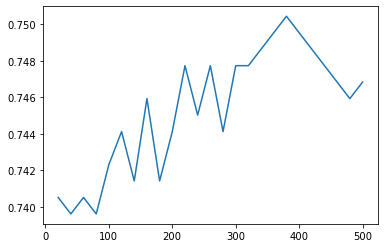

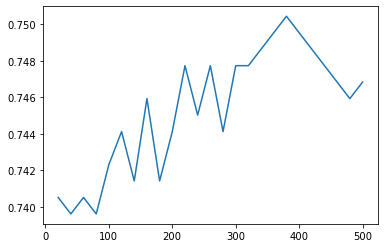

In [729]:
# first just plot test scores
# x axis - a list of the values for number of estimators
x = df.n_estimators
# two arguments to plot are the x axis values and the y axis values
# y axis - list of test scores
plt.plot(x, df.Test_score)
# finally, to show the plots
plt.show('')

Note: This is the table data visualised, 320 is the max

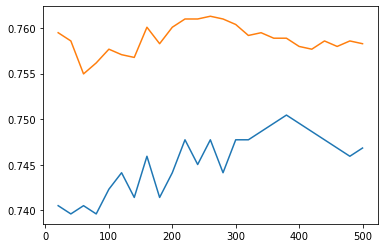

In [730]:
# now plot train and test scores
# x axis - a list of the values for number of estimators
x = df.n_estimators
# y axis - list of Test scores
# two arguments to plot are the x axis values and the y axis values
plt.plot(x , df.Test_score)
# do another plot, with same x axis, and on the y axis - list of train scores
plt.plot(x, df.Train_score)
plt.savefig('logistic.png')
# finally, to show the plots
plt.show()


## Results: confusion matrix for Random Forest Classifier

 Confusion matrix Random Forest after optimisation test


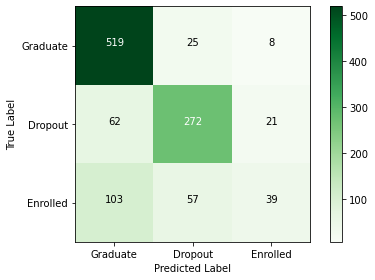

Classification Report Random Forest

              precision    recall  f1-score   support

    Graduate       0.76      0.94      0.84       552
     Dropout       0.77      0.77      0.77       355
    Enrolled       0.57      0.20      0.29       199

    accuracy                           0.75      1106
   macro avg       0.70      0.63      0.63      1106
weighted avg       0.73      0.75      0.72      1106



In [731]:
model = RandomForestClassifier(n_estimators=380, random_state=2, max_depth=5)
model.fit(X_train, y_train)
# Make predictions on the test data
y_pred = model.predict(X_test)
print(" Confusion matrix Random Forest after optimisation test")
plot_confusion_matrix( y_test, y_pred, 'confusion-forest.png')
print("Classification Report Random Forest\n")
print(classification_report(y_test,y_pred,labels=class_labels))

### Opitimsation 2: scaled version of the data, using Standard Scaler

In [732]:
# this instantiate an object of StandardScaler, this means it creates a 'workspace/tool' in my sklearn 'toolbox' 
scaler = StandardScaler()
# now we show the scaler the data, to say look at this 
scaler.fit(X_train) 

# now we apply the scaler to the training set
X_train_scaled = scaler.transform(X_train) 

# now we apply the scaler to the test set
#if we use a scaler we need to remember to create Train and Test that is scaled
X_test_scaled = scaler.transform(X_test) 

In [733]:
#wanted to see it in pf format which is nicer to read 
#created as a dataframe
list_of_entries = []
headers = ["n_estimators", "Train_score", "Test_score"]

for count in range(2, 20, 2):
    forest = RandomForestClassifier(n_estimators=count, random_state=2, max_depth=5)
    forest.fit(X_train_scaled, y_train)
    train_score = forest.score(X_train_scaled, y_train)
    test_score = forest.score(X_test_scaled, y_test)
    entry = [count, train_score, test_score]
    list_of_entries.append(entry)

df2 = pd.DataFrame(list_of_entries, columns=headers)
df2.sort_values(by=["Test_score", "Train_score"], ascending=False, inplace=True)

In [734]:
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
# z = (x - u) / s
# x rep one column/feature 
# u is the mean 
# s is the spread 
# we learn that there is a transformation of the column to be treated equally to all other columns see lin18
# compare above 'output2' to 'output 4', we see:
# it makes to values centered around zero and equally spread around zero 
# so StandardScaler is really effecting the concept of Standard deviation and not Standardising anything 
# that the concept I think we needed to understand here 

Build two versions of a default random forest model, using the normal data (X_train, X_test) and the scaled data (X_train_scaled, X_test_scaled). Print train and test scores for normal and scaled.

In [735]:
#using the normal data (X_train, X_test) 
y_train
# guides me to use a RandomForestClassifer cos Yes Or No 
# RandomForestRegressor would be used it y was numeric

3908    Graduate
1950     Dropout
3323     Dropout
1111    Graduate
2429     Dropout
          ...   
4234    Enrolled
1156     Dropout
1066    Graduate
1071    Graduate
2451     Dropout
Name: Target, Length: 3318, dtype: object

In [736]:
forest = RandomForestClassifier(random_state=0)# build the forest classifer 
forest.fit(X_train, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.762


In [737]:
# scaled data (X_train_scaled, X_test_scaled)

In [738]:
forest = RandomForestClassifier(random_state=0)# build the forest classifer
forest.fit(X_train_scaled, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.763


## Build Multi-layer Perceptron (MLP) Classifier

Now try mlp models with different values for the hidden layer size. Try with a single hidden layer, with sizes ranging from 1 to 100, incremented by 5. (Use the MLP parameter, hidden_layer_sizes, which takes a value as a tuple -- for a single hidden layer, just one value in parenthesis.) Save the train and test scores in two lists, and print the results, sorted by test score.

In [739]:
mlp = MLPClassifier(max_iter=1000,random_state=1)# build the classifier
mlp.fit(X_train, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.810
Accuracy on test set: 0.745


In [740]:
# aim is to tune the MLP 
# https://www.youtube.com/watch?v=u5GAVdLQyIg
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
list_of_entries = []
headers = ["hidden-layer-size", "Train_score", "Test_score",'recall']
for count in range (1,102,5): #increment 5 at each iteration
    mlp = MLPClassifier(hidden_layer_sizes = count, max_iter=1000,random_state=1)
    mlp.fit(X_train, y_train) # train model 
    y_pred = mlp.predict(X_test)
    entry = [count, mlp.score(X_train, y_train),
             mlp.score(X_test,y_test),
            recall_score(y_test,y_pred, labels=class_labels,average=None)[1]] #adding the scores to variable
    list_of_entries.append(entry)
dfOpt = pd.DataFrame(list_of_entries, columns= headers)
dfOpt.sort_values(by=["Train_score", "Test_score"], ascending=False)

,hidden-layer-size,Train_score,Test_score,recall
19,96,0.817661,0.743219,0.709859
20,101,0.808620,0.759494,0.749296
18,91,0.807715,0.754069,0.743662
15,76,0.803797,0.730561,0.757746
14,71,0.789030,0.750452,0.794366
11,56,0.786317,0.756781,0.721127
17,86,0.781495,0.760398,0.769014
10,51,0.781193,0.747740,0.763380
16,81,0.780289,0.755877,0.752113
3,16,0.772755,0.746835,0.752113


## Results: confusion matrix for MLP

 Confusion matrix MLP after optimisation test


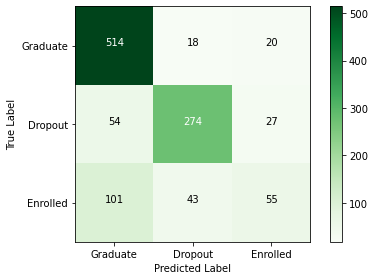

Classification Report Multi-layer Perceptron

              precision    recall  f1-score   support

    Graduate       0.77      0.93      0.84       552
     Dropout       0.82      0.77      0.79       355
    Enrolled       0.54      0.28      0.37       199

    accuracy                           0.76      1106
   macro avg       0.71      0.66      0.67      1106
weighted avg       0.74      0.76      0.74      1106



In [741]:
# Make predictions on the test data
mlp = MLPClassifier(hidden_layer_sizes = 56, max_iter=1000) # we selcted hidden_layer_sizes = 56
mlp.fit(X_train, y_train) # train model 
y_pred = mlp.predict(X_test)
print(" Confusion matrix MLP after optimisation test")
plot_confusion_matrix( y_test, y_pred, 'confusion-mlp.png')
print("Classification Report Multi-layer Perceptron\n")
print(classification_report(y_test,y_pred,labels=class_labels))

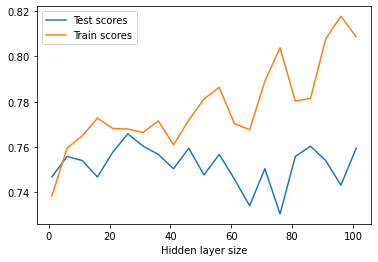

In [742]:
# typically we would have a set of data for tuning, in the project we can do it this way 
# we will not set up a validation data set 
# x axis - a list of the values for number of estimators

# y axis - list of train scores
# two arguments to plot are the x axis values and the y axis values

# do another plot, with same x axis, and on the y axis - list of test scores

# finally need to show the plots

plt.plot(dfOpt['hidden-layer-size'], dfOpt['Test_score'], label='Test scores')
plt.plot(dfOpt['hidden-layer-size'], dfOpt['Train_score'], label='Train scores')
plt.legend()
plt.xlabel('Hidden layer size')
plt.show()

Findings: So we find the training data to be slightly better than the testing data with outlier sitting at 21 and 96, not sure why.

### Build a scaled version of the data, using Standard Scaler

Load the telco data file we used in Lab 3, and perform a train-test split. Create a scaled version of the data, using Standard Scaler. Call the scaled version X_train_scaled, and X_test_scaled.

Build two versions of a default mlp model, using the normal data (X_train, X_test) and the scaled data (X_train_scaled, X_test_scaled). Print train and test scores for normal and scaled.

In [743]:
# this instantiate an object of StandardScaler, this means it creates a 'workspace/tool' in my sklearn 'toolbox' 
scaler = StandardScaler()
# now we show the scaler the data, to say look at this 
scaler.fit(X_train) 

# now we apply the scaler to the training set
X_train_scaled = scaler.transform(X_train) 

# now we apply the scaler to the test set
#if we use a scaler we need to remember to create Train and Test that is scaled
X_test_scaled = scaler.transform(X_test) 

Build two versions of a default mlp model, using the normal data (X_train, X_test) and the scaled data (X_train_scaled, X_test_scaled). Print train and test scores for normal and scaled.

In [744]:
# using the normal data (X_train, X_test) 

In [745]:
mlp = MLPClassifier()# build the classifier
mlp.fit(X_train, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.809
Accuracy on test set: 0.735


In [746]:
# scaled data (X_train_scaled, X_test_scaled)

In [747]:
mlp = MLPClassifier()# build the classifier
mlp.fit(X_train_scaled, y_train) # train model 
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.831
Accuracy on test set: 0.678


/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


Now try mlp models with different values for the hidden layer size. Try with two hidden layers, with sizes ranging from 1 to 20, incremented by 5. For each iteration, fit the model to both the normal and scaled data. Save the train and test scores for both in two lists. Also print the scaled and normal results at each iteration.

In [748]:
# normal data

In [749]:
# aim is to tune the MLP 
# https://www.youtube.com/watch?v=u5GAVdLQyIg
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html
list_of_entries = []
headers = ["hidden-layer-size L1", "hidden-layer-size L2",
           "Train_score", "Test_score",                                   
           "Train_score_scaled", "Test_score_scaled", 'recall_score', "recall_scaled"]

for count1 in range (1,21,5): #increment 5 at each iteration
    for count2 in range (1,21,5): #increment 5 at each iteration
       
        # this means it creates a 'workspace/tool' in my sklearn 'toolbox' for to use the MLPClassifier
        #tuple of count1 and count2 to create 2 hidden layers
        mlp = MLPClassifier(hidden_layer_sizes = (count1,count2)) # we define the layers of the hidden layers
        mlp_scaled = MLPClassifier(hidden_layer_sizes = (count1,count2))
        
        mlp.fit(X_train, y_train) # train model 
        mlp_scaled.fit(X_train_scaled, y_train) # train model for scaled data
        y_pred = mlp.predict(X_test)
        y_pred_scaled = mlp.predict(X_test_scaled)
        #adding the scores to variable 'entry'
        entry = [count1, count2, mlp.score(X_train, y_train), 
                                 mlp.score(X_test,y_test),
                                 mlp_scaled.score(X_train_scaled, y_train), 
                                 mlp_scaled.score(X_test_scaled,y_test),
                recall_score(y_test,y_pred, labels=class_labels,average=None)[1],
                recall_score(y_test,y_pred_scaled, labels=class_labels,average=None)[1]
            ]
        list_of_entries.append(entry)
        
df = pd.DataFrame(list_of_entries, columns= headers)

/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/vatsal/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:4

In [750]:
df.sort_values(by=["recall_score","recall_scaled"], ascending=False)

,hidden-layer-size L1,hidden-layer-size L2,Train_score,Test_score,Train_score_scaled,Test_score_scaled,recall_score,recall_scaled
4,6,1,0.735986,0.736890,0.752260,0.745931,0.839437,1.000000
8,11,1,0.741410,0.738698,0.739602,0.732369,0.833803,0.980282
9,11,6,0.756178,0.752260,0.778481,0.764014,0.788732,0.405634
7,6,16,0.767932,0.759494,0.773357,0.755877,0.777465,0.169014
14,16,11,0.773357,0.758590,0.788728,0.758590,0.774648,0.608451
3,1,16,0.734479,0.728752,0.749849,0.752260,0.771831,0.323944
6,6,11,0.762508,0.747740,0.773056,0.754973,0.769014,0.557746
1,1,6,0.732670,0.728752,0.739904,0.739602,0.763380,0.205634
11,11,16,0.761302,0.749548,0.782700,0.757685,0.760563,0.971831
13,16,6,0.764919,0.757685,0.789632,0.751356,0.754930,0.600000


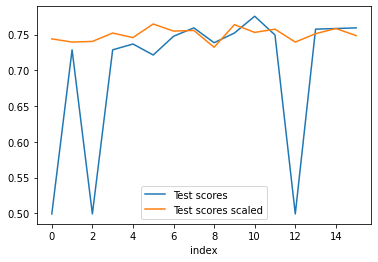

In [751]:
plt.plot(df['Test_score'], label='Test scores') #plotting it by df index 
plt.plot(df['Test_score_scaled'], label='Test scores scaled')
plt.legend()
plt.xlabel('index')
plt.show()

Findings: we can see scaled data set is almost always better expect at index 2 ( hidden level 1 =1 and hl2 = 11)

In [752]:
df.sort_values(by=["Test_score_scaled","Train_score_scaled"], ascending=False)

,hidden-layer-size L1,hidden-layer-size L2,Train_score,Test_score,Train_score_scaled,Test_score_scaled,recall_score,recall_scaled
5,6,6,0.738095,0.721519,0.773056,0.764919,0.738028,0.123944
9,11,6,0.756178,0.752260,0.778481,0.764014,0.788732,0.405634
14,16,11,0.773357,0.758590,0.788728,0.758590,0.774648,0.608451
11,11,16,0.761302,0.749548,0.782700,0.757685,0.760563,0.971831
7,6,16,0.767932,0.759494,0.773357,0.755877,0.777465,0.169014
6,6,11,0.762508,0.747740,0.773056,0.754973,0.769014,0.557746
10,11,11,0.764316,0.775769,0.777275,0.753165,0.746479,0.340845
3,1,16,0.734479,0.728752,0.749849,0.752260,0.771831,0.323944
13,16,6,0.764919,0.757685,0.789632,0.751356,0.754930,0.600000
15,16,16,0.776974,0.759494,0.795961,0.748644,0.718310,0.343662


In [753]:
#https://towardsdatascience.com/performance-metrics-confusion-matrix-precision-recall-and-f1-score-a8fe076a2262

#The Confusion Matrix & Precision-Recall Tradeoff
#https://www.qualtrics.com/support/stats-iq/analyses/regression-guides/confusion-matrix-precision-recall-tradeoff/

In [754]:
# SMOTE 
#https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/

In [755]:

# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=10000),
}

# Define the parameters for grid search
params = {
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100]},
    'Random Forest': {'n_estimators': [10, 50, 100, 200]},
    'Multi-layer Perceptron': {'hidden_layer_sizes': [(50,), (100,), (150,)]},
}

# Create a list to hold the results
results = []

# Grid search
for model in models.keys():
    clf = GridSearchCV(models[model], params[model], cv=5)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    results.append({
        "Model": model,
        "Best Parameters": clf.best_params_,
        "Train Score": train_score,
        "Test Score": test_score,
    })

# Convert the list to DataFrame
results_df = pd.DataFrame(results)

# Set float formatting for Train Score and Test Score
results_df['Train Score'] = results_df['Train Score'].map('{:.4f}'.format)
results_df['Test Score'] = results_df['Test Score'].map('{:.4f}'.format)

# Set max column width for Best Parameters
pd.set_option('display.max_colwidth', 50)

# Print the results DataFrame
print(results_df.to_string(index=False))


                 Model               Best Parameters Train Score Test Score
                   KNN            {'n_neighbors': 9}      0.7453     0.6935
   Logistic Regression                    {'C': 0.1}      0.7589     0.7595
         Random Forest         {'n_estimators': 200}      1.0000     0.7640
Multi-layer Perceptron {'hidden_layer_sizes': (50,)}      0.7854     0.7667


In [756]:
# Define the models
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=10000),
}

# Define the parameters for grid search
params = {
    'KNN': {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']},
    'Logistic Regression': {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']},
    'Random Forest': {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10]},
    'Multi-layer Perceptron': {'hidden_layer_sizes': [(50,), (100,), (150,)], 'activation': ['relu', 'tanh']},
}

# Rest of the code remains the same...
# Create a list to hold the results
results = []

# Grid search
for model in models.keys():
    clf = GridSearchCV(models[model], params[model], cv=5)
    clf.fit(X_train, y_train)

    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    results.append({
        "Model": model,
        "Best Parameters": clf.best_params_,
        "Train Score": train_score,
        "Test Score": test_score,
    })

# Convert the list to DataFrame
results_df = pd.DataFrame(results)

# Set float formatting for Train Score and Test Score
results_df['Train Score'] = results_df['Train Score'].map('{:.4f}'.format)
results_df['Test Score'] = results_df['Test Score'].map('{:.4f}'.format)

# Set max column width for Best Parameters
pd.set_option('display.max_colwidth', 50)

# Print the results DataFrame
print(results_df.to_string(index=False))

                 Model                                     Best Parameters Train Score Test Score
                   KNN           {'n_neighbors': 9, 'weights': 'distance'}      1.0000     0.6899
   Logistic Regression                       {'C': 0.1, 'solver': 'lbfgs'}      0.7589     0.7595
         Random Forest            {'max_depth': None, 'n_estimators': 200}      1.0000     0.7613
Multi-layer Perceptron {'activation': 'relu', 'hidden_layer_sizes': (50,)}      0.7845     0.7568


In [757]:
# Split your dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [758]:

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Create an MLP classifier
mlp = MLPClassifier(max_iter=1000)

# Train the MLP classifier on the resampled training data
mlp.fit(X_train_resampled, y_train_resampled)

# Evaluate the model's accuracy on the training set
train_accuracy = mlp.score(X_train_resampled, y_train_resampled)

# Evaluate the model's accuracy on the test set
test_accuracy = mlp.score(X_test, y_test)

# Print the training and test accuracies
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))


Accuracy on training set: 0.816
Accuracy on test set: 0.708


In [759]:
# Print the value counts of the target variable before and after applying SMOTE
print("Before SMOTE:")
print(pd.Series(y_train).value_counts())

print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Graduate    1657
Dropout     1066
Enrolled     595
Name: Target, dtype: int64

After SMOTE:
Graduate    1657
Dropout     1657
Enrolled    1657
Name: Target, dtype: int64


## Optimised MPL Parameters 

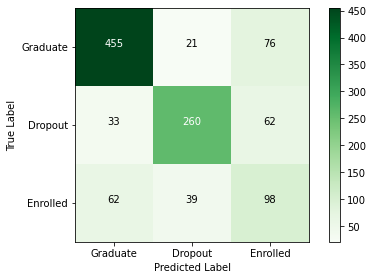

              precision    recall  f1-score   support

    Graduate       0.83      0.82      0.83       552
     Dropout       0.81      0.73      0.77       355
    Enrolled       0.42      0.49      0.45       199

    accuracy                           0.74      1106
   macro avg       0.69      0.68      0.68      1106
weighted avg       0.75      0.74      0.74      1106



In [760]:
# Make predictions on the test data
mlp = MLPClassifier(hidden_layer_sizes = 56, max_iter=1000) # we selcted hidden_layer_sizes = 56
mlp.fit(X_train_resampled, y_train_resampled) # train optimised model 
y_pred = mlp.predict(X_test) # its the same test data, we didnt change it 
plot_confusion_matrix( y_test, y_pred, 'confusion-mlpSMOTE.png')
print(classification_report(y_test,y_pred,labels=class_labels))

In [761]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Define the models with the given parameters
knn = KNeighborsClassifier(n_neighbors=11, weights='uniform')
lr = LogisticRegression(C=100, max_iter=1000)
rf = RandomForestClassifier(n_estimators=380,random_state=2, max_depth=5)
mlp = MLPClassifier(hidden_layer_sizes=(96,), max_iter=1000)

models = [('k-Nearest Neighbors', knn), ('Logistic Regression', lr), 
          ('Random Forest', rf), ('Multi-Layer Perceptron', mlp)]

# Initialize a list to store the results
results = []

# Fit the models and calculate accuracy
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    train_preds = model.predict(X_train_resampled)
    test_preds = model.predict(X_test)
    train_acc = accuracy_score(y_train_resampled, train_preds)
    test_acc = accuracy_score(y_test, test_preds)
    results.append(pd.DataFrame({'Model': [name], 
                                 'Training Accuracy': [train_acc], 
                                 'Test Accuracy': [test_acc]}))

# Concatenate all results into a single DataFrame
results_df = pd.concat(results, ignore_index=True)

print(results_df)


                    Model  Training Accuracy  Test Accuracy
0     k-Nearest Neighbors           0.772883       0.603978
1     Logistic Regression           0.725609       0.725136
2           Random Forest           0.737679       0.736890
3  Multi-Layer Perceptron           0.827801       0.698915


In [762]:
from sklearn.metrics import classification_report

# Fit the models and generate classification reports
for name, model in models:
    model.fit(X_train_resampled, y_train_resampled)
    test_preds = model.predict(X_test)

    # Classification report
    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, test_preds,labels=class_labels))



Classification Report for k-Nearest Neighbors:
              precision    recall  f1-score   support

    Graduate       0.77      0.60      0.68       552
     Dropout       0.76      0.63      0.69       355
    Enrolled       0.29      0.55      0.38       199

    accuracy                           0.60      1106
   macro avg       0.61      0.60      0.58      1106
weighted avg       0.68      0.60      0.63      1106


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

    Graduate       0.83      0.78      0.80       552
     Dropout       0.92      0.68      0.78       355
    Enrolled       0.40      0.64      0.49       199

    accuracy                           0.73      1106
   macro avg       0.71      0.70      0.69      1106
weighted avg       0.78      0.73      0.74      1106


Classification Report for Random Forest:
              precision    recall  f1-score   support

    Graduate       0.82      0.83      0.82  